In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

 Now our next step is edge detection. In order to effectively detect an edge we need 
to follow the following step:
    1. convert into grey image. Colourful image has the combination of 3 colors    red,green,blue
    called 3 channel on the other hand grey image is one channel containing ony one color with
    varying intensity from 0-255



In [5]:
image=cv2.imread('test_image1.jpg')# 0 for grey image
lane_image=np.copy(image)
gray=cv2.cvtColor(lane_image,cv2.COLOR_RGB2GRAY)
cv2.imshow('result',gray)
#cv2.waitKey(0)# for indefinite wait unless key stroke,for saving you can use imwrite()

STEP2 :Nise reduction

In [6]:
blur=cv2.GaussianBlur(gray,(5,5),0)
cv2.imshow('blurred',blur)
#cv2.waitKey(0)

In [22]:
class ImageProcess:
    def image_preprocessing(self,path_of_image):
        image=cv2.imread(path_of_image)
        lane_image=np.copy(image)
        gray=cv2.cvtColor(lane_image,cv2.COLOR_RGB2GRAY)
        blur=cv2.GaussianBlur(gray,(5,5),0)
        return blur
    def merge_image(self,lane_image,line_image):
        combo_image=cv2.addWeighted(lane_image,0.8,line_image,1,1)
        return combo_image

    #def collect_frames(self,vedio):
    #    cap=cv2.VideoCapture("solidWhiteRight.mp4")
     #   while(cap.isOpened()):
       #     _ ,frame=cap.read()
        #    canny_image=canny(frame)
         #   cropped_image=region_of_interest(canny_image)
          #  lines=cv2.HoughLinesP(cropped_image,2,np.pi/180,100,np.array([]),minLineLength=40,maxLineGap=5)# return 3d array
          #  averaged_lines=average_slope_intercept(lane_image,lines)
            #line_image=display_lines(lane_image,averaged_lines)
           # combo_image=cv2.addWeighted(lane_image,0.8,line_image,1,1)
           # cv2.imshow('combined image',combo_image)
           # if cv2.waitKey(1) & 0XFF==ord('q'):
           # break
        #cap.release()
        #cv2.destroyAllWindows()
     
        
        

In [16]:
class CannyClass:
    def canny(self,image):
      #gray=cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
      #blur=cv2.GaussianBlur(gray,(5,5),0)
      canny=cv2.Canny(image,50,150)
      return canny
    
    def region_of_interest(self,image):
        height=image.shape[0]
        polygon=np.array([[(300,height),(1000,height),(580,250)]])
        mask=np.zeros_like(image)
        cv2.fillPoly(mask,polygon,255)
        masked_image=cv2.bitwise_and(image,mask)
        return masked_image
    

In [27]:
class HoughClass:
    def display_lines(self,image,lines):
        line_image=np.zeros_like(image)
        if lines is not None:
            for line in lines:
                x1,y1,x2,y2=line.reshape(4)
                cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)# third argu is for color of line only,last one is thickness of line
        return line_image  
    
    def make_coordinates(self,image,line_parameters):
        slope,intercept=line_parameters
        y1=image.shape[0]#(y coordiante,x coo,number of chhanelded)
        y2=int(y1*3/5)
        x1=int((y1-intercept)/slope)
        x2=int((y2-intercept)/slope)
        return np.array([x1,y1,x2,y2])
    
    def average_slope_intercept(self,image,lines):
        left_fit=[]
        right_fit=[]
        for line in lines:
            x1,y1,x2,y2=line.reshape(4)
            parameters=np.polyfit((x1,x2),(y1,y2),1)# it print slope and y intercept
            slope=parameters[0]
            intercept=parameters[1]
            if slope<0:
                left_fit.append((slope,intercept))
            else:
                right_fit.append((slope,intercept))
        average_left_fit=np.average(left_fit,axis=0)
        average_right_fit=np.average(right_fit,axis=0)
        left_line=make_coordinates(image,average_left_fit)
        right_line=make_coordinates(image,average_right_fit)
        return np.array([left_line,right_line])

    

# Step3 : Applying canny algo....working of this algo is shown in ppt

In [17]:
canny=cv2.Canny(blur,200,250)
cv2.imwrite('c_200_250.jpg',canny)
cv2.imshow('canny',canny)
#cv2.waitKey(0)

 So,now Let me cover this one process in a function, matplot also conatin function imshow()  and show it just use show(), so I am replacing it

In [35]:
#def canny(image):
    #gray=cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
    #blur=cv2.GaussianBlur(gray,(5,5),0)
   # canny=cv2.Canny(image,50,150)
    #return canny
    

In [36]:
#def region_of_interest(image):
 #   height=image.shape[0]
  #  polygon=np.array([[(300,height),(1000,height),(580,250)]])
   # mask=np.zeros_like(image)
    #cv2.fillPoly(mask,polygon,255)
    #masked_image=cv2.bitwise_and(image,mask)
    #return masked_image
    
    
    

In [18]:
def display_lines(image,lines):
    line_image=np.zeros_like(image)
    if lines is not None:
        for line in lines:
            x1,y1,x2,y2=line.reshape(4)
            cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)# third argu is for color of line only,last one is thickness of line
    return line_image    

In [19]:
def make_coordinates(image,line_parameters):
    slope,intercept=line_parameters
    y1=image.shape[0]#(y coordiante,x coo,number of chhanelded)
    y2=int(y1*3/5)
    x1=int((y1-intercept)/slope)
    x2=int((y2-intercept)/slope)
    return np.array([x1,y1,x2,y2])

In [20]:
def average_slope_intercept(image,lines):
    left_fit=[]
    right_fit=[]
    for line in lines:
            x1,y1,x2,y2=line.reshape(4)
            parameters=np.polyfit((x1,x2),(y1,y2),1)# it print slope and y intercept
            slope=parameters[0]
            intercept=parameters[1]
            if slope<0:
                left_fit.append((slope,intercept))
            else:
                right_fit.append((slope,intercept))
    average_left_fit=np.average(left_fit,axis=0)
    average_right_fit=np.average(right_fit,axis=0)
    left_line=make_coordinates(image,average_left_fit)
    right_line=make_coordinates(image,average_right_fit)
    return np.array([left_line,right_line])
    

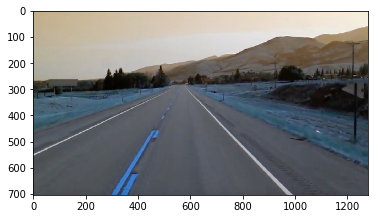

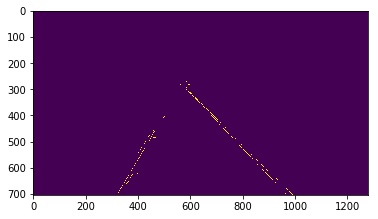

255

In [42]:
#image=cv2.imread('test_image1.jpg')
#lane_image=np.copy(image)
path_of_image='test_image1.jpg'
object_of_imageClass=ImageProcess()
lane_image=object_of_imageClass.imagepreprocessing(path_of_image)

object_of_cannyClass=CannyClass()
canny_image=object_of_cannyClass.canny(lane_image)
#canny_image=canny(lane_image)
cv2.imshow('result',canny_image)
cv2.waitKey(0)
plt.imshow(image)
plt.show()
cropped_image=object_of_cannyClass.region_of_interest(canny_image)
plt.imshow(cropped_image)
plt.show()
cv2.imshow('result',cropped_image)
cv2.waitKey(0)

# Now Hough transformation. this algo is used to find straght line ,more specifically it connects two or more points
. it draw number of lines throgh each of points abd draw hough space (m vs b) or(p,angle ) in polar coordinate.
and it draws line according to value of (m,b) or(p,angle) which has more intersection tha others points..refer ppt for 
more detail

# houghLinesP(image,resolution parameter,size of bin, min threshold,placehold array,minlinelength,mxlinegap)  
bin it is box in our hough trnasformation...  min threshold  it is min voting required for getting accepted so tht we can draw a line .....optimizing step

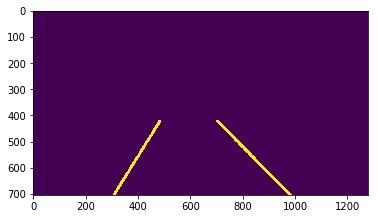

255

In [30]:
#image=cv2.imread('test_image1.jpg')
#lane_image=np.copy(image)
#canny_image=canny(lane_image)
#cropped_image=region_of_interest(canny_image)
path_of_image='test_image1.jpg'
object_of_imageClass=ImageProcess()
lane_image=object_of_imageClass.image_preprocessing(path_of_image)

object_of_cannyClass=CannyClass()
canny_image=object_of_cannyClass.canny(lane_image)
cropped_image=object_of_cannyClass.region_of_interest(canny_image)
object_of_houghClass=HoughClass()
lines=cv2.HoughLinesP(cropped_image,2,np.pi/180,100,np.array([]),minLineLength=40,maxLineGap=5)# return 3d array
averaged_lines=object_of_houghClass.average_slope_intercept(lane_image,lines)
line_image=object_of_houghClass.display_lines(lane_image,averaged_lines)
combo_image=object_of_imageClass.merge_image(lane_image,line_image)
plt.imshow(line_image)
plt.show()
cv2.imshow('result',line_image)
cv2.waitKey(0)

# now our next step is to combine original image with image which having lane detection

In [29]:
image=cv2.imread('test_image1.jpg')
lane_image=np.copy(image)
canny_image=canny(lane_image)
cropped_image=region_of_interest(canny_image)
lines=cv2.HoughLinesP(cropped_image,2,np.pi/180,100,np.array([]),minLineLength=40,maxLineGap=5)# return 3d array
averaged_lines=average_slope_intercept(lane_image,lines)
line_image=display_lines(lane_image,averaged_lines)
combo_image=cv2.addWeighted(lane_image,0.8,line_image,1,1)# .8  and 1 are pixel parameter for intensity of two image

plt.imshow(line_image)
plt.show()
cv2.imshow('combined image',combo_image)
cv2.waitKey(0)

TypeError: 'numpy.ndarray' object is not callable

In [64]:
cap=cv2.VideoCapture("solidWhiteRight.mp4")
while(cap.isOpened()):
    _ ,frame=cap.read()
    canny_image=canny(frame)
    cropped_image=region_of_interest(canny_image)
    lines=cv2.HoughLinesP(cropped_image,2,np.pi/180,100,np.array([]),minLineLength=40,maxLineGap=5)# return 3d array
    averaged_lines=average_slope_intercept(lane_image,lines)
    line_image=display_lines(lane_image,averaged_lines)
    combo_image=cv2.addWeighted(lane_image,0.8,line_image,1,1)
    cv2.imshow('combined image',combo_image)
    if cv2.waitKey(1) & 0XFF==ord('q'):
        break
cap.release()
cv2.destroyAllWindows()
    
   
    

TypeError: 'numpy.float64' object is not iterable